In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# import dataset
dataset=pd.read_csv(r'C:\Users\Appsysm-3\Downloads\Delivery_Time.csv')

In [3]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


C:\Users\Appsysm-3\AppData\Local\Temp\ipykernel_25388\1177312615.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Delivery Time'])
C:\Users\Appsysm-3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Delivery Time', ylabel='Density'>

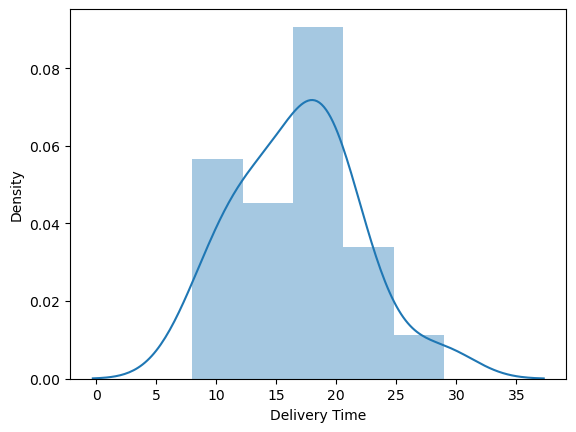

In [5]:
sns.distplot(dataset['Delivery Time'])

C:\Users\Appsysm-3\AppData\Local\Temp\ipykernel_25388\2444698888.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sorting Time'])
C:\Users\Appsysm-3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sorting Time', ylabel='Density'>

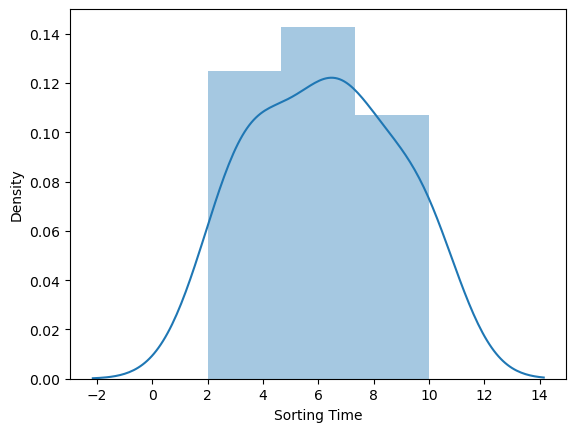

In [6]:
sns.distplot(dataset['Sorting Time'])

# Renaming Columns

In [7]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [8]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

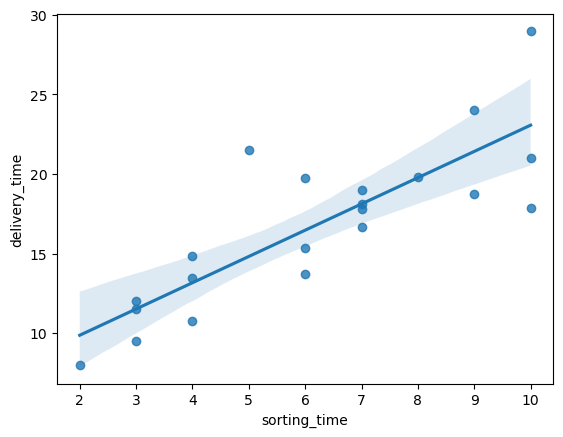

In [9]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

# Model Building

In [10]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

# Model Testing

In [11]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        12:22:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [14]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [15]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [16]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [17]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [18]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [20]:
import matplotlib.pyplot as plt

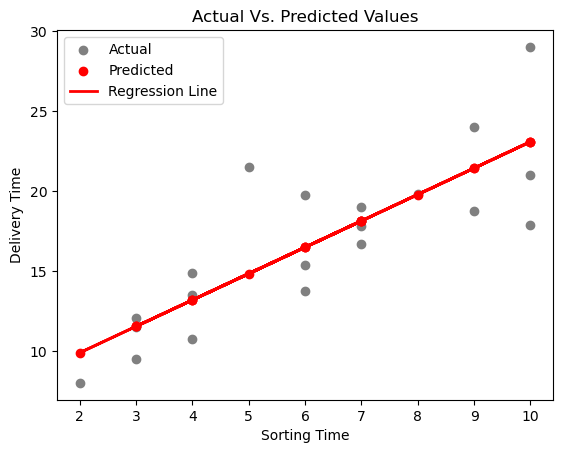

In [23]:
# Plotting Actual Vs. Predicted Values
plt.scatter(model.model.exog[:, 1], model.model.endog, color='gray', label='Actual')  # exog[:, 1] is the predictor variable
predicted_time = model.fittedvalues
plt.scatter(model.model.exog[:, 1], predicted_time, color='red', label='Predicted')
plt.plot(model.model.exog[:, 1], predicted_time, color='red', linewidth=2, label='Regression Line')

plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend()

plt.show()

# Errors:

In [25]:
from sklearn import metrics

# Calculate metrics using the actual 'delivery_time' and predicted values
print('Mean Absolute Error:', metrics.mean_absolute_error(model.model.endog, predicted_time))
print('Mean Squared Error:', metrics.mean_squared_error(model.model.endog, predicted_time))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(model.model.endog, predicted_time)))

Mean Absolute Error: 2.0857409551882653
Mean Squared Error: 7.793311548584063
Root Mean Squared Error: 2.7916503270617654


# Building model with Logarithmic Transformation

# Y = a + b * log(x)

In [37]:
import statsmodels.api as sm

In [44]:
data1 = pd.DataFrame.copy(dataset)
data1['log_sorting_time'] = np.log(data1.sorting_time)
data1.head()

,delivery_time,sorting_time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


In [46]:
log_model = smf.ols('delivery_time ~ log_sorting_time', data = data1).fit()

In [47]:
# Coefficients Bo and B1
Bo, B1 = log_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (log_model.tvalues, log_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  1.1596835115465813
Sorting Time, B1:  9.043413458205762
tvalue:  Intercept           0.472460
log_sorting_time    6.586789
dtype: float64
pvalue:  Intercept           0.641980
log_sorting_time    0.000003
dtype: float64
R2:  0.6954434611324223
R2_Adj:  0.6794141696130761


Checking predictions of Model by equation
From the result Bo = 1.1596835115465813 and B1 = 9.043413458205762, so our linear regression equation will become Y = Bo + B1*log(X)
Y = 1.1596835115465813 + 9.043413458205762*log(X)

In [48]:
predicted_time = log_model.predict(data1.log_sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,21.982913
1,13.50,13.696517
2,19.75,17.363305
3,24.00,21.030094
4,29.00,21.982913
5,15.35,17.363305
6,19.00,18.757354
7,9.50,11.094889
8,17.90,21.982913
9,18.75,21.030094


# Plotting Actual Vs. Predicted Values

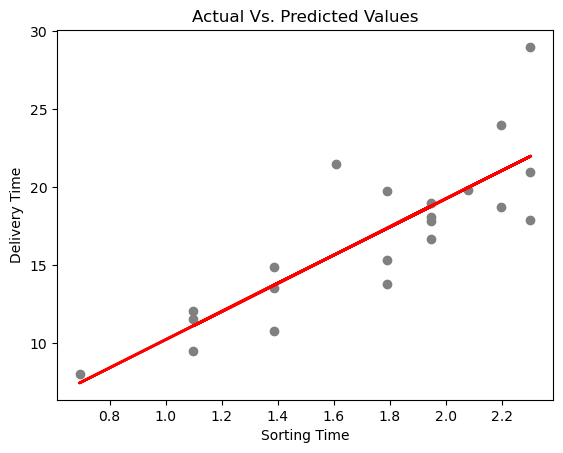

In [49]:
plt.scatter(data1.log_sorting_time, data1.delivery_time,  color='gray')
plt.plot(data1.log_sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Errors

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.delivery_time, predicted_time))

Mean Absolute Error: 2.0473757067928995
Mean Squared Error: 7.470226320948425
Root Mean Squared Error: 2.733171476682066
R^2 Score :           0.6954434611324223


# Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

In [52]:
from scipy.stats import anderson


Anderson-Darling test statistic: 0.5034974709193349
Residuals are normally distributed at all tested significance levels


C:\Users\Appsysm-3\AppData\Local\Temp\ipykernel_25388\59326652.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)
C:\Users\Appsysm-3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


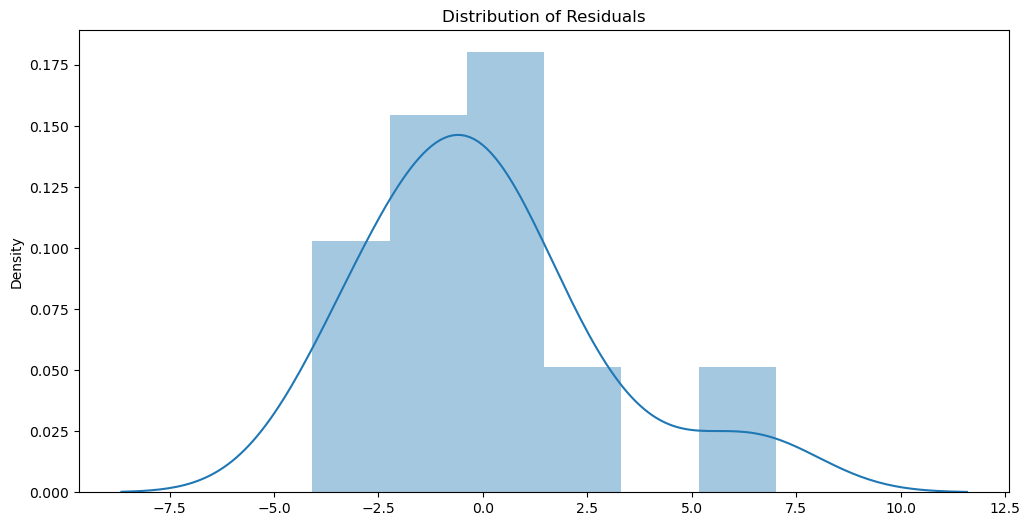

In [58]:
from scipy.stats import anderson
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate residuals
residuals = data1['delivery_time'] - predicted_time
p_value_thresh = 0.05

# Performing the Anderson-Darling test for normality on the residuals
result = anderson(residuals)

# Extract the Anderson-Darling test statistic and critical values
test_statistic = result.statistic
critical_values = result.critical_values

# Print the Anderson-Darling test statistic
print('Anderson-Darling test statistic:', test_statistic)

# Check against critical values for different significance levels
for i, cv in enumerate(critical_values):
    if test_statistic > cv:
        print(f'Residuals are not normally distributed at {result.significance_level[i]:.1%} significance level')
        break
else:
    print('Residuals are normally distributed at all tested significance levels')

# Plotting the residuals distribution
plt.figure(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [56]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           2.64e-06
Time:                        14:34:18   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Building model with square root transformation¶

# √Y = a + b * X + e

In [59]:
# preparing data to build model
data1['sqrt_delivery_time'] = np.sqrt(data1.delivery_time)
data1.head()

,delivery_time,sorting_time,log_sorting_time,sqrt_delivery_time
0,21.00,10,2.302585,4.582576
1,13.50,4,1.386294,3.674235
2,19.75,6,1.791759,4.444097
3,24.00,9,2.197225,4.898979
4,29.00,10,2.302585,5.385165


In [60]:
# Building model
sqrt_model = smf.ols('sqrt_delivery_time ~ sorting_time', data = data1).fit()

# Important Parameters:

In [61]:
# Coefficients Bo and B1
Bo, B1 = sqrt_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (sqrt_model.tvalues, sqrt_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (sqrt_model.rsquared, sqrt_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  2.7727310393450324
Sorting Time, B1:  0.20663181804577496
tvalue:  Intercept       13.527452
sorting_time     6.723095
dtype: float64
pvalue:  Intercept       3.339366e-11
sorting_time    2.001215e-06
dtype: float64
R2:  0.704049871541756
R2_Adj:  0.6884735489913221


In [62]:
predicted_time = sqrt_model.predict(data1.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.sqrt_delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,4.582576,4.839049
1,3.674235,3.599258
2,4.444097,4.012522
3,4.898979,4.632417
4,5.385165,4.839049
5,3.917908,4.012522
6,4.358899,4.219154
7,3.082207,3.392626
8,4.230839,4.839049
9,4.330127,4.632417


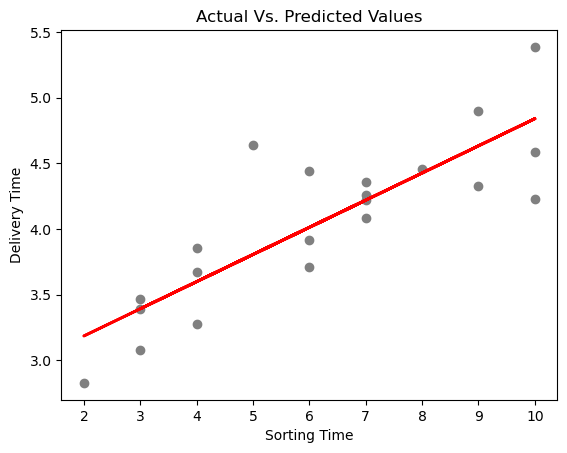

In [63]:
plt.scatter(data1.sorting_time, data1.sqrt_delivery_time,  color='gray')
plt.plot(data1.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Errors

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.sqrt_delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.sqrt_delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.sqrt_delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.sqrt_delivery_time, predicted_time))

Mean Absolute Error: 0.2562892192762892
Mean Squared Error: 0.11045382417324966
Root Mean Squared Error: 0.33234594050965877
R^2 Score :           0.704049871541756


In [65]:
pred_df = pd.DataFrame({'Actual': (data1.sqrt_delivery_time)**2, 'Predicted': (predicted_time)**2})
pred_df

,Actual,Predicted
0,21.00,23.416397
1,13.50,12.954660
2,19.75,16.100332
3,24.00,21.459291
4,29.00,23.416397
5,15.35,16.100332
6,19.00,17.801258
7,9.50,11.509915
8,17.90,23.416397
9,18.75,21.459291


# Anderson-Darling test

Anderson-Darling test p-value: 15.0
Residuals are normally distributed


C:\Users\Appsysm-3\AppData\Local\Temp\ipykernel_25388\3554179194.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)
C:\Users\Appsysm-3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


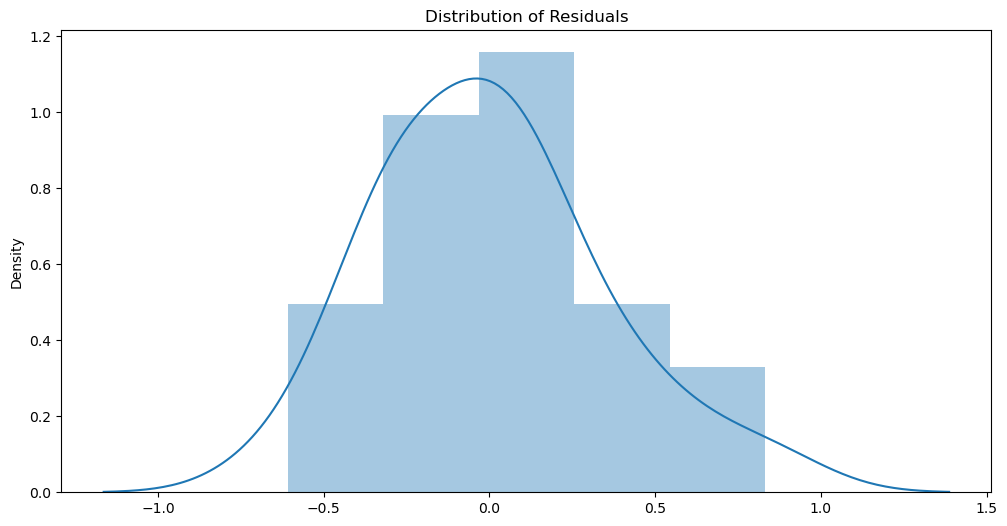

In [68]:
from scipy.stats import anderson
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data1' is your DataFrame, 'predicted_time' is the predicted values

# Calculate residuals
residuals = data1['sqrt_delivery_time'] - predicted_time

# Set the significance level
p_value_thresh = 0.05

# Performing the Anderson-Darling test for normality on the residuals
result = anderson(residuals)

p_value = result.significance_level[0]

print('Anderson-Darling test p-value:', p_value)

if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

plt.figure(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [69]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_delivery_time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           2.00e-06
Time:                        14:51:05   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Logrithm Transformation Model
Mean Absolute Error: 2.0473757067928995
Mean Squared Error: 7.470226320948425
Root Mean Squared Error: 2.733171476682066
R^2 Score : 0.6954434611324223


# Square-root Transformation Model
Mean Absolute Error: 0.2562892192762892
Mean Squared Error: 0.11045382417324966
Root Mean Squared Error: 0.33234594050965877
R^2 Score : 0.704049871541756¶